# Part II - (FordGoBike System Data)
## by (Taiwo Olorunsogbon)





## Investigation Overview


> In this investigation, I wanted to look at to the customer behaviour characteristics, I focused on time, age, gender, duration, and user type to analyze and understand the usage of bike When, Who, How?


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata-master.csv', index_col=0)

In [3]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,age_category,start_time_month,start_time_monthly,start_time_day,start_time_hour,end_time_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,False,35.0,31-40,February,19-02,Thursday,17,8,869.75


In [4]:
# functions to fix types
def change_to_string(df,fields):
    for field in fields:
        df[field] = df[field].astype(np.object)
    return df

def change_to_category(df,fields):
    for field in fields:
        df[field] = df[field].astype('category')
    return df

In [5]:
df = change_to_string (df,['start_station_id', 'end_station_id','bike_id'])
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df = change_to_category (df,['user_type', 'member_gender'])

In [6]:
sns.set(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(20,7)})
base_color = sns.color_palette()[0]

## (Visualization 1)
### Number of Bike ride for member user type

> In our dataset there are two type of user:

- Subscriber
- Customer
In the next visualization I will show the volumn of bike rides for all members user type

*In the dataset, there are more Subscriber than Customers.*

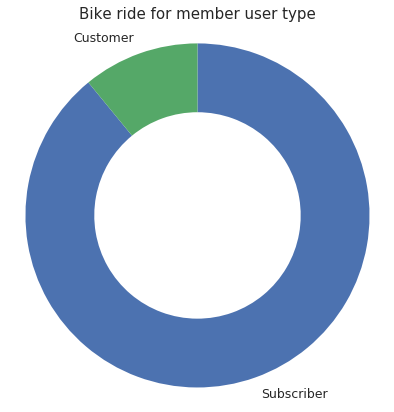

In [7]:
user_counts = df['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title("Bike ride for member user type", fontsize=15);

## (Visualization 2)
### The Daily Usage of Bike Rides Per Gender

> Based on our data we have three gender male, female and other. In the next visualization I will show the number of bike rides for each day based on gender

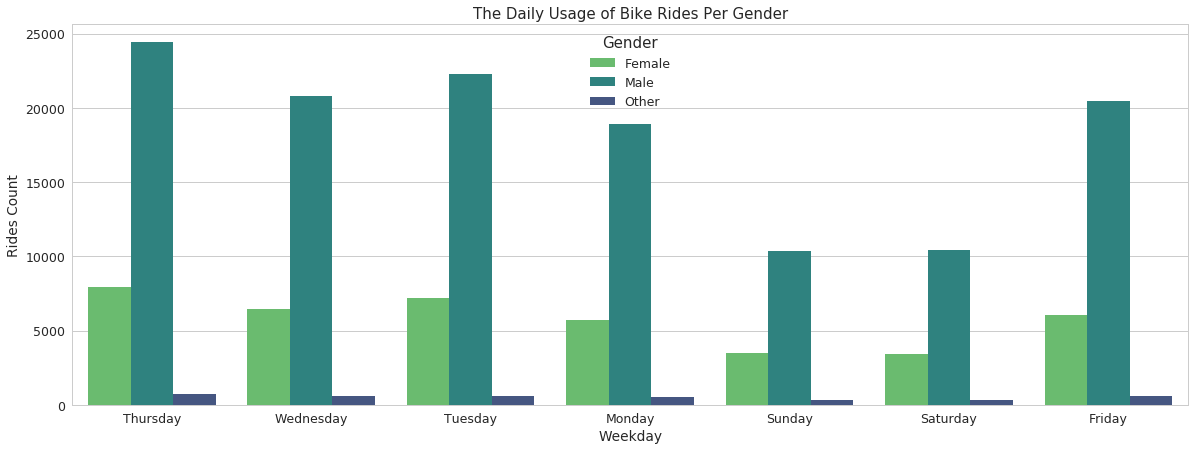

In [8]:
plot = sns.countplot(data=df, x='start_time_day', hue='member_gender',
                palette='viridis_r')
plot.legend().set_title('Gender')
plot.set_ylabel('Rides Count')
plot.set_xlabel('Weekday')
plot.set_title('The Daily Usage of Bike Rides Per Gender', fontsize=15);


## (Visualization 3)
### Bike Rides for User Types per Members Age Categories
The visualization will show the number of bike rides for the user types based on the different age categories

I divided members age into 5 categories.

* 11-20
* 21-30
* 31-40
* 41-50
* 51-60

*So, I will show number of bike rides per category by the user type.*

In [9]:
n_points = df.shape[0]

max_count_age = df['age_category'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

my_order = ['11-20', '21-30', '31-40', '41-50', '51-60']



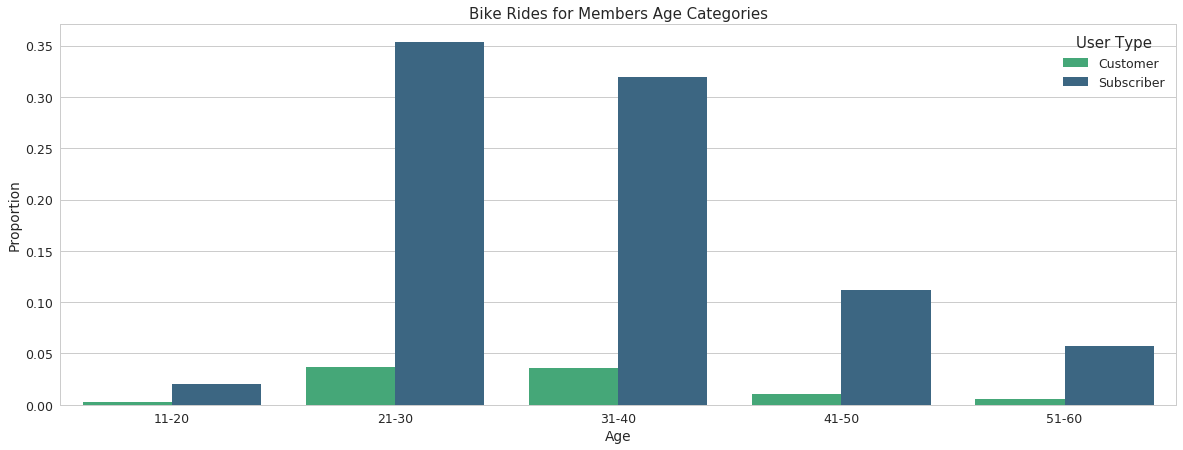

In [10]:
sns.countplot(data=df, x='age_category', hue='user_type', order=my_order, palette='viridis_r')
ax = plt.gca()
ax.legend().set_title('User Type')
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('Age')
ax.set_title("Bike Rides for Members Age Categories", fontsize=15);


## (Visualization 4)
### The Daily Usage of Bike Rides by weekday

*In this visualization, I want show the day of the week where we have most bike trips in decending order*

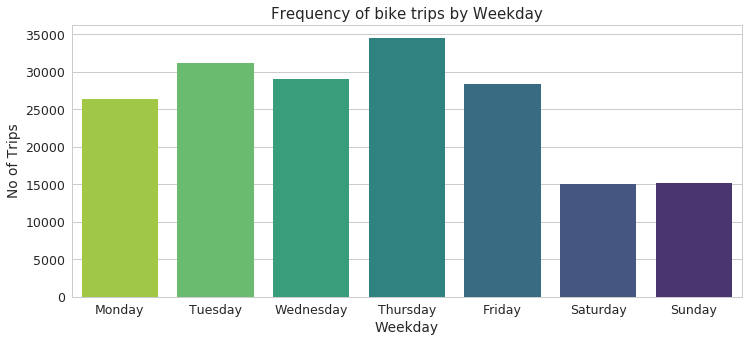

In [11]:
plt.figure(figsize = [12, 5])
days_ordered = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['days_ordered'] = pd.Categorical(df['start_time_day'], categories=days_ordered, ordered=True)

sns.countplot(data = df, x = 'start_time_day', order = days_ordered, palette = 'viridis_r')
plt.xticks(rotation = 0)
plt.xlabel('Weekday')
plt.ylabel('No of Trips')
plt.title('Frequency of bike trips by Weekday');


## (Visualization 5)
### Correlation between each variables

*In this visualization, I want show the correlation between each variables in the dataset*

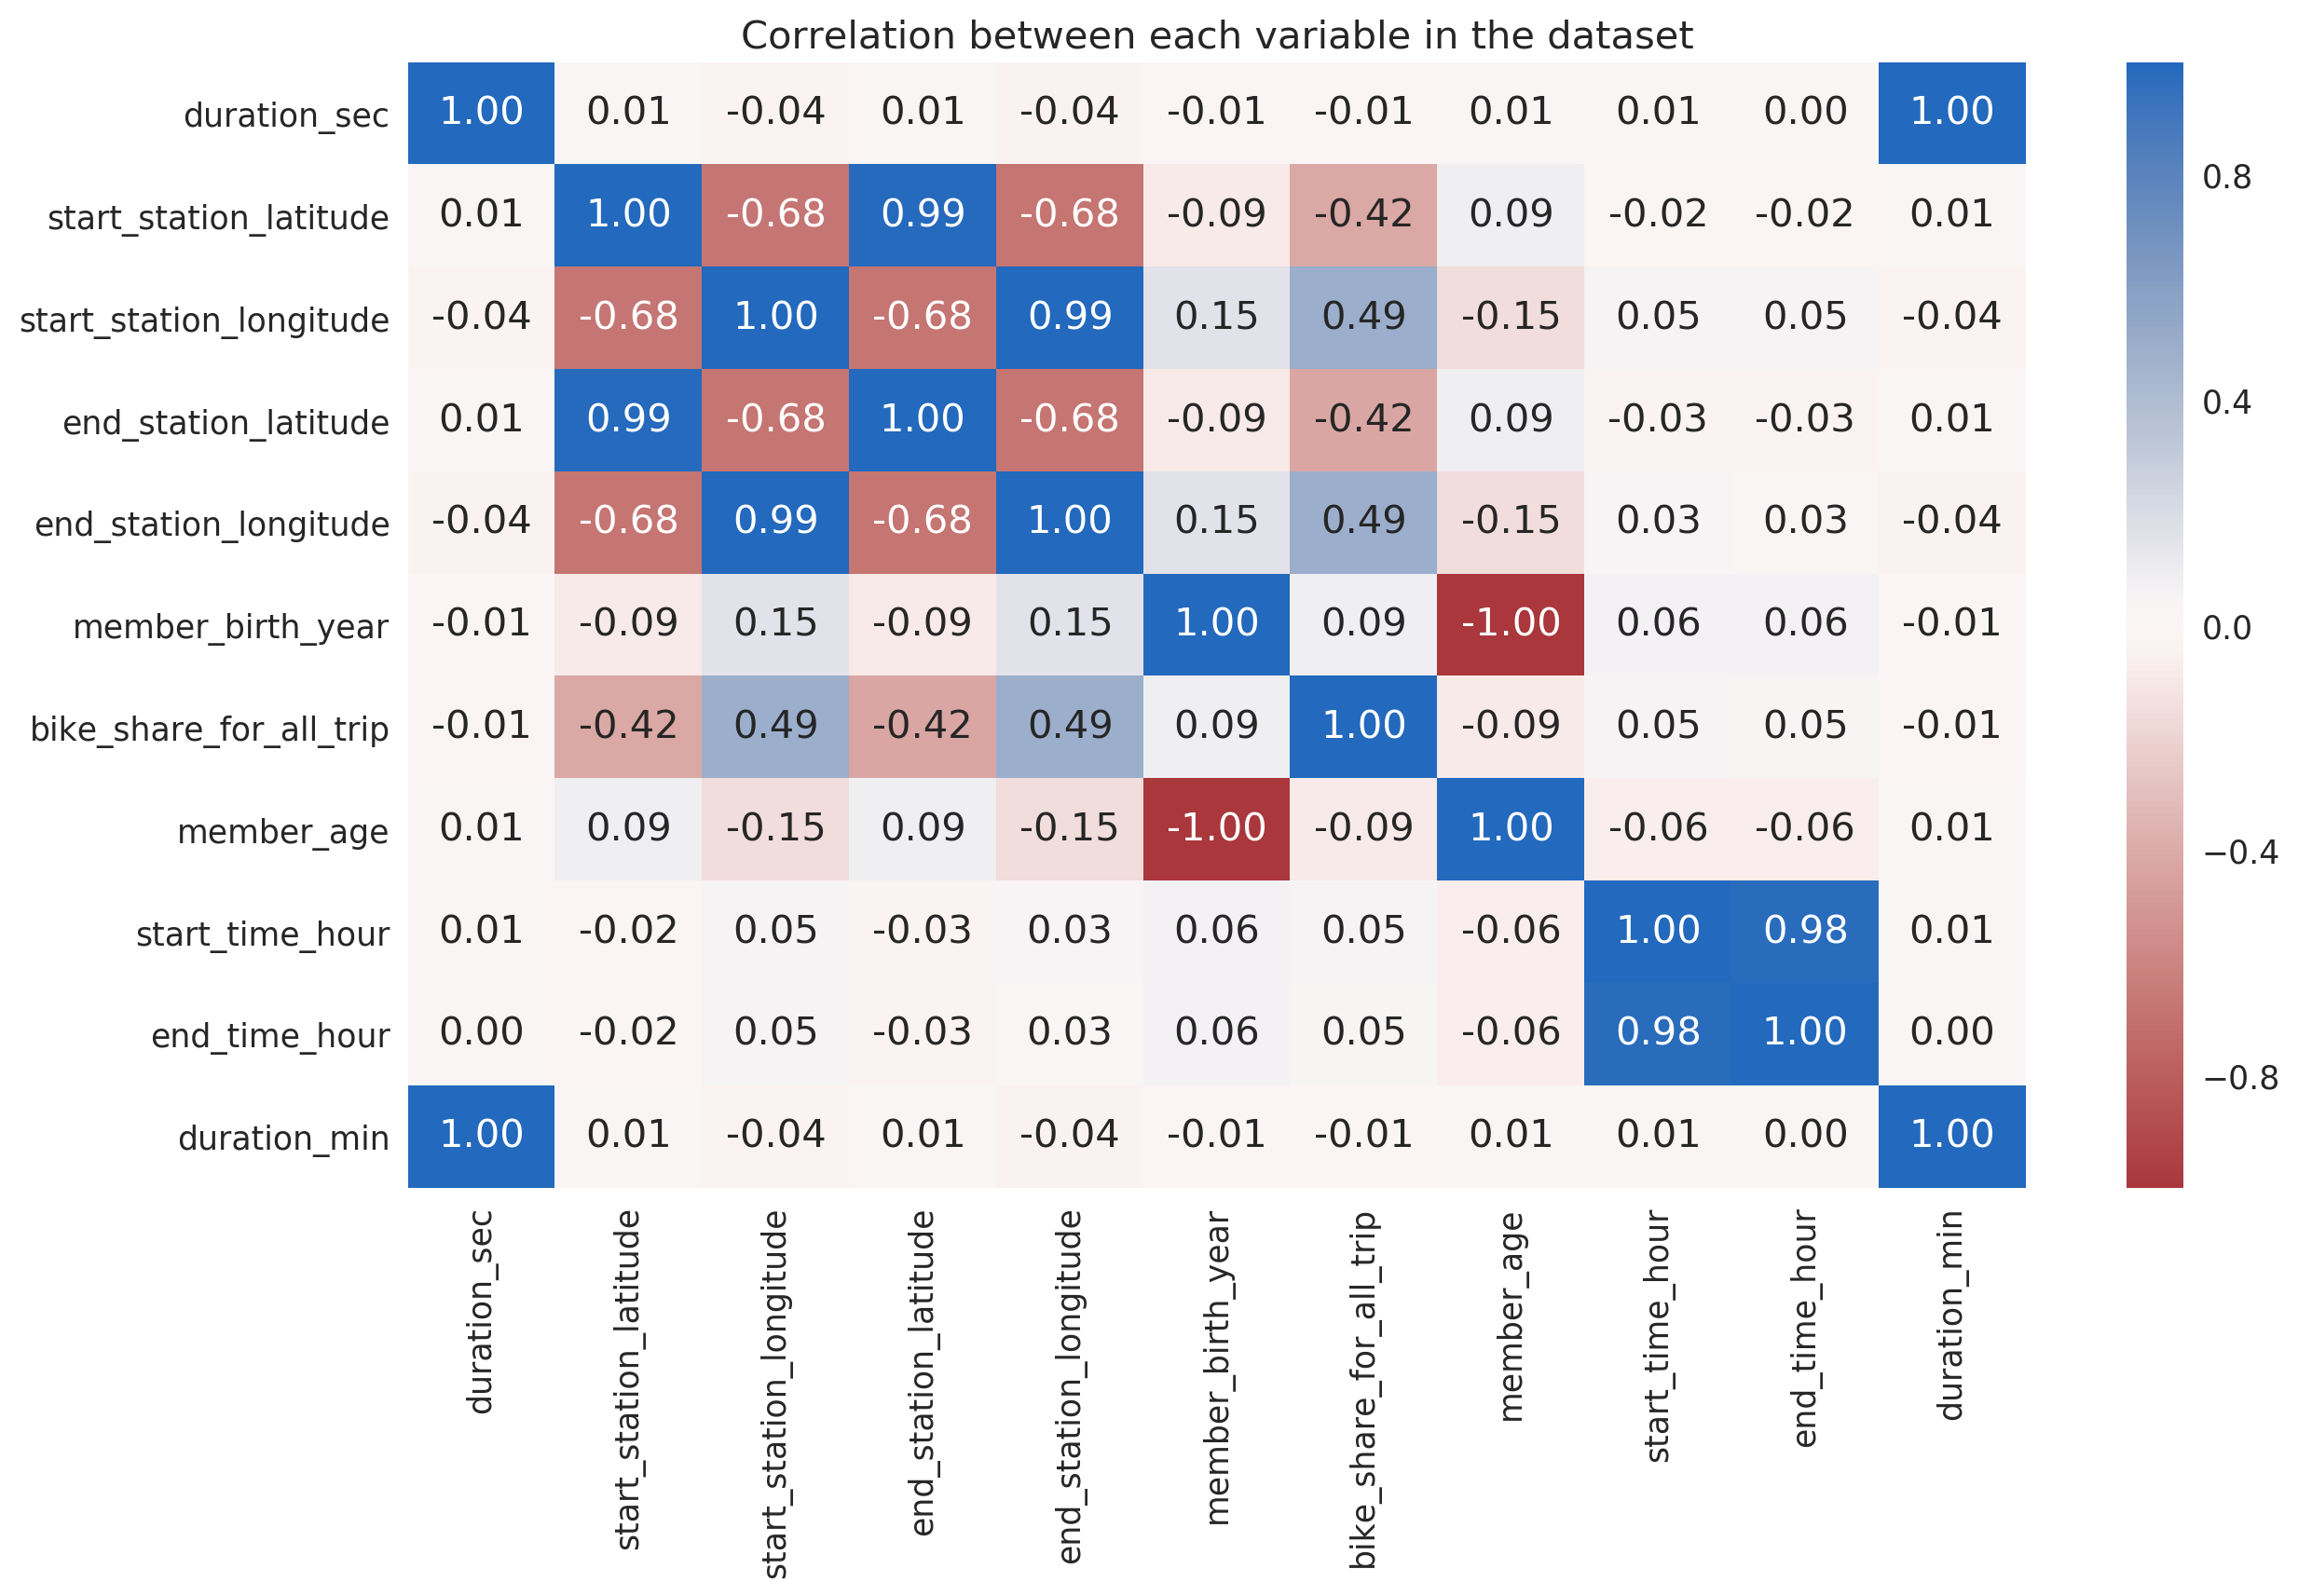

In [12]:
plt.figure(figsize = (14,8), dpi = 200)


sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title("Correlation between each variable in the dataset")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
!jupyter nbconvert --version

5.4.0


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_Exploration_Ford_GoBike..ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Exploration_Ford_GoBike..ipynb to slides
[NbConvertApp] Writing 936000 bytes to Part_II_Exploration_Ford_GoBike..slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Exploration_Ford_GoBike..slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: